In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [7]:
# Load the dataset
df = pd.read_csv('Data/tenant_default_risk_dataset.csv')

In [9]:
# Step 1: Data Preprocessing
# Check for missing values
if df.isnull().sum().any():
    print("Missing values detected. Handling missing values...")
    df.fillna(df.mean(), inplace=True)

In [11]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [13]:
# Separate features (X) and target (y)
X = df.drop(columns=['Default_Risk'])  # Features
y = df['Default_Risk']  # Target variable

In [33]:
# Step 2: Identify Numerical and Categorical Columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [35]:
# Step 3: Create a Preprocessor
# Standardize numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [37]:
# Step 4: Create the Pipeline
# Pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [39]:
# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Step 6: Train the Model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Tenant_ID', 'Age', 'Income_Level', 'Credit_Score', 'Past_Default',
       'Debt_to_Income_Ratio', 'Monthly_Rent', 'Lease_Term_Months',
       'Security_Deposit', 'Property_Size_SqFt', 'Unemployment_Rate',
       'GDP_Growth_Rate'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [43]:
# Step 7: Make Predictions
y_pred = pipeline.predict(X_test)

In [45]:
# Step 8: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       689

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



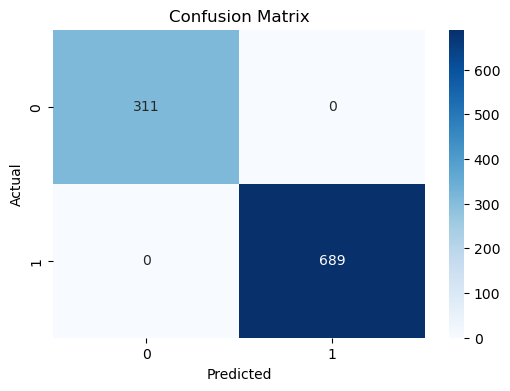

In [47]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [51]:
# Step 9: Save the Pipeline (Optional)
import joblib
joblib.dump(pipeline, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']

In [53]:
# # Load the saved pipeline
# loaded_pipeline = joblib.load('random_forest_pipeline.pkl')

# # Make predictions on new data
# new_data = pd.DataFrame([...])  # Replace with actual new data
# predictions = loaded_pipeline.predict(new_data)
# print(predictions)
